## Figures for Precambrian Research Submission - OFP
## **OFP Stratigraphic Columns & Chemostratigraphy**
  
Connor S. van Wieren, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms
from matplotlib import colors
import matplotlib
import pandas as pd
import seaborn as sns
from VanStrat.VanStrat_simple import *
import string
from scipy.ndimage import rotate
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
import pickle
import dill
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.5, 3.5)
%config InlineBackend.figure_format='retina'

sns.set_style('ticks',{'axes.edgecolor':'.3',
                       'xtick.color':'.3',
                       'ytick.color':'.3',
                       'text.color': '.3',
                       'axes.labelcolor':'.3',
                       'axes.grid': False,
                       'grid.linestyle': u'-.'})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)

fig_dir = '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/Publications/OFP_PC/img/'
home = '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/vanWieren_OFP_PrecRes/data/'

In [2]:
secs = pd.read_excel(home+'./sections/sections_com.xlsx')
secs.columns

Index(['index', 'member', 'thickness', 'lithology', 'facies', 'grade',
       'features', 'sample_name', 'sample_height', 'sample_facies',
       'sample_features', 'facies_simplified', 'sample_facies_simplified',
       'trace_facies_simplified', 'sample_lith', 'trace_facies', 'd13c_carb',
       'd18o_carb', 'Li_umol_molCa', 'Na_mmol_molCa', 'Mg_mmol_molCa',
       'Al_mmol_molCa', 'K_mmol_molCa', 'V_umol_molCa', 'Mn_mmol_molCa',
       'Fe_mmol_molCa', 'Rb_umol_molCa', 'Sr_mmol_molCa', 'Th_umol_molCa',
       'U_umol_molCa'],
      dtype='object')

In [3]:
print(len(get_style(secs,f='facies_simplified')))
get_style(secs,f='facies_simplified')

14


{'limestone-siltstone rhythmite': ('color', 'width', 'grade', 'limestone'),
 'crystalline limestone': ('color', 'width', 'grade', 'limestone'),
 'shale': ('color', 'width', 'grade', 'siliciclastic'),
 'carbonate breccia': ('color', 'width', 'grade', 'limestone'),
 'siltstone-intraclast carbonate breccia couplets': ('color',
  'width',
  'grade',
  'limestone'),
 'siltstone': ('color', 'width', 'grade', 'siliciclastic'),
 'cover': ('color', 'width', 'grade', 'cover'),
 'sandstone': ('color', 'width', 'grade', 'siliciclastic'),
 'silty limestone': ('color', 'width', 'grade', 'limestone'),
 'mudstone': ('color', 'width', 'grade', 'siliciclastic'),
 'carbonate cemented siltstone': ('color', 'width', 'grade', 'limestone'),
 'ls mudstone': ('color', 'width', 'grade', 'limestone'),
 'conglomerate': ('color', 'width', 'grade', 'siliciclastic'),
 'intraclast carbonate breccia': ('color', 'width', 'grade', 'limestone')}

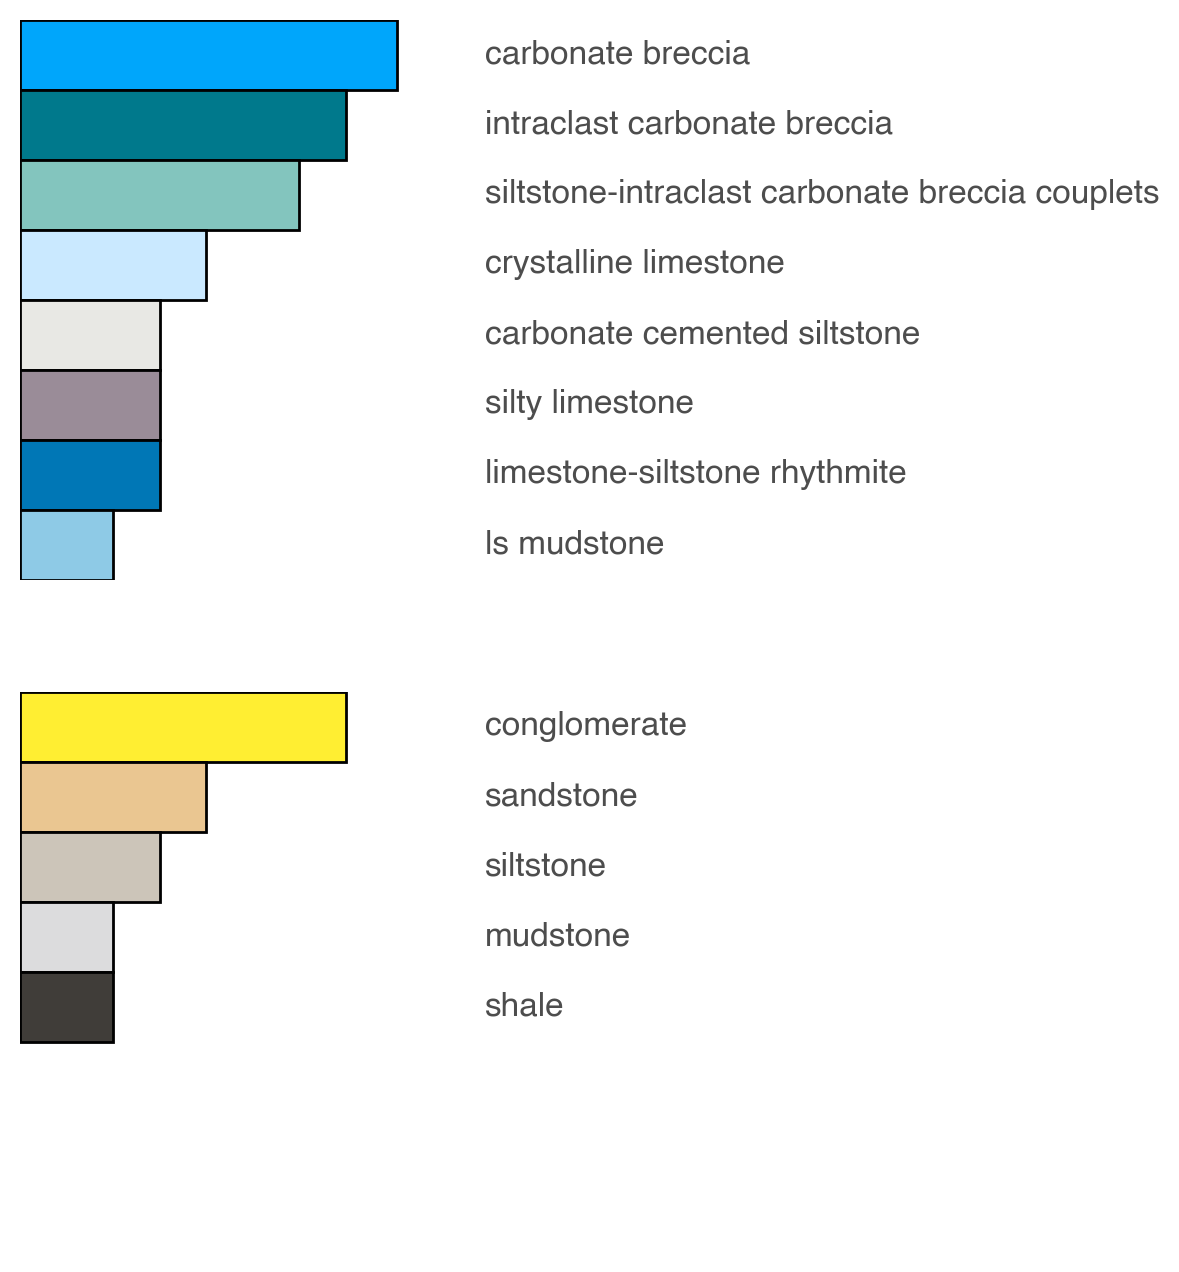

In [4]:
master_leg = {'limestone-siltstone rhythmite': ('#0077b6', 0.3, 'grade', 'limestone'),
              'crystalline limestone': ('#cae9ff',0.4, 'grade', 'limestone'),
              'shale': ('#403d39', 0.2, 'grade', 'siliciclastic'),
              'carbonate breccia': ('#00a6fb', 0.81, 'grade', 'limestone'),
              'siltstone': ('#ccc5b9', 0.3, 'grade', 'siliciclastic'),
              'cover': ('#ffffff', 0, 'grade', 'cover'),
              'sandstone': ('#eac691', 0.4, 'grade', 'siliciclastic'),
              'silty limestone': ('#9a8c98', 0.3, 'grade', 'limestone'),
              'mudstone': ('#dcdcdd', 0.2, 'grade', 'siliciclastic'),
              'siltstone-intraclast carbonate breccia couplets': ('#83c5be',0.6,'grade','limestone'),
              'ls mudstone': ('#8ecae6', 0.2, 'grade', 'limestone'),
              'conglomerate': ('#ffee32', 0.7, 'grade', 'siliciclastic'),
              'intraclast carbonate breccia': ('#00798c', 0.7, 'grade', 'limestone'),
              'carbonate cemented siltstone': ('#e8e8e4', 0.3, 'grade', 'limestone')}


master_lith_style = {'limestone': 'tab:blue', 'siliciclastic': 'tab:red'}

master_feature_style={'authigenic nodules': nodule,
 'breccia lenses': breccia,
 'pyrite': pyrite,
 'ripples': ripples,
 'ICT': breccia}

test=VanStrat(secs,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style);
fig,ax = plt.subplots(2,1,figsize=(3,8));
test.strat_leg(ax=ax[0],ax1=ax[1],sep_lith=True,grade=False,label_loc='right',stretch=1);
# plt.subplots_adjust(wspace=0);
ax[0].axis('off')
ax[0].xaxis.grid()
ax[1].axis('off')
ax[1].xaxis.grid()

fig.savefig(fig_dir+'legend.svg',format='svg',bbox_inches='tight',transparent=True)

In [5]:
totc = []
for key,val in master_leg.items():
    if val[3]=='limestone':
        totc.append(val[3])
ncarb = len(totc)
nsil = len(master_leg)-ncarb

## Make Carbonates and Siliciclastics get own palettes

In [6]:
pal = sns.color_palette('BrBG',n_colors=2*ncarb).as_hex()
BG = sns.color_palette([*pal][ncarb:][::1])
BG

[(0.9058823529411765, 0.9490196078431372, 0.9411764705882353),
 (0.8, 0.9215686274509803, 0.9058823529411765),
 (0.6509803921568628, 0.8627450980392157, 0.8313725490196079),
 (0.48627450980392156, 0.792156862745098, 0.7450980392156863),
 (0.30980392156862746, 0.6666666666666666, 0.6313725490196078),
 (0.1607843137254902, 0.5450980392156862, 0.5137254901960784),
 (0.0392156862745098, 0.43529411764705883, 0.403921568627451),
 (0.00392156862745098, 0.3333333333333333, 0.29411764705882354)]

In [7]:
Br = sns.color_palette([*pal][:nsil])
Br

[(0.4588235294117647, 0.2627450980392157, 0.03137254901960784),
 (0.5843137254901961, 0.34901960784313724, 0.06274509803921569),
 (0.7019607843137254, 0.4627450980392157, 0.1450980392156863),
 (0.792156862745098, 0.596078431372549, 0.28627450980392155),
 (0.8666666666666667, 0.7450980392156863, 0.47058823529411764),
 (0.9215686274509803, 0.8392156862745098, 0.6352941176470588)]

In [8]:
# style=master_leg
# carb_legend = []
# carb_labs = []
# sil_legend = []
# sil_labs = []
# for key,val in master_leg.items():
#     if val[3] in ['limestone','dolostone','dolomite','carbonate']:
#         carb_legend.append(style[key])
#         carb_labs.append(key)
#     elif val[3] in ['siliciclastic','cover']:
#         sil_legend.append(style[key])
#         sil_labs.append(key)

# carb_leg = dict(zip(carb_labs,carb_legend))
# sil_leg = dict(zip(sil_labs,sil_legend))

# # carb palette
# #cmap = sns.color_palette('Blues',n_colors=len(carb_leg)).as_hex()
# #cm1 = [*cmap][::-1]
# cm1 = BG[::-1]

# # sort by coarseness
# carb_leg = dict(sorted(carb_leg.items(), reverse=True,key=lambda item: item[1][1]))

# # color with sorted colour scheme
# for c,(key,val) in zip(cm1,carb_leg.items()):
#     l = list(val)
#     l[0] = c
#     carb_leg[key] = tuple(l)
    
# # sil palette
# #cmap = sns.color_palette('Greys',n_colors=len(sil_leg)).as_hex()
# #cm1 = [*cmap][::-1]
# cm1 = Br

# # sort by coarseness
# sil_leg = dict(sorted(sil_leg.items(), reverse=True,key=lambda item: item[1][1]))

# # color with sorted colour scheme
# for c,(key,val) in zip(cm1,sil_leg.items()):
#     l = list(val)
#     l[0] = c
#     sil_leg[key] = tuple(l)

# # merge into one legend
# master_leg = sil_leg.copy()
# master_leg.update(carb_leg)

# check it out
# test=VanStrat(secs,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style);
# fig,ax = plt.subplots(2,1,figsize=(3,8));
# test.strat_leg(ax=ax[0],ax1=ax[1],sep_lith=True,grade=False,label_loc='right',stretch=1);
# # plt.subplots_adjust(wspace=0);
# ax[0].axis('off')
# ax[0].xaxis.grid()
# ax[1].axis('off')
# ax[1].xaxis.grid()

# fig.savefig(fig_dir+'legend.svg',format='svg',bbox_inches='tight',transparent=True)

## Rebuild strat columns

In [9]:
# set(secs['index'])
C1_sec_below_unf1 = secs[secs['index']=='GSM Type 1']
C1_sec_below_unf2 = secs[secs['index']=='GSM Type 3']
C1_sec_below = pd.concat([C1_sec_below_unf2,C1_sec_below_unf1])
C1_sec_above = secs[secs['index']=='GSM Type 2']
C2_sec = secs[secs['index']=='GSM Type 4']
C3_sec = secs[secs['index']=='Marmot Road']
C5_sec = secs[secs['index']=='Pyrite Point']
C13_sec = secs[secs['index']=='Wolverine']
C12_sec = secs[secs['index']=='Boomerang']
C16_sec = secs[secs['index']=='McKale Creek']
C9_sec = secs[secs['index']=='Railway']
C8_sec = secs[secs['index']=='Temple Lake']

In [10]:
## Rebuild Sections with new legend
# jasper
gsm=VanStrat(C1_sec_below,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style)
thrust=VanStrat(C2_sec,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style)
marm=VanStrat(C3_sec,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style)
pyr = VanStrat(C5_sec,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style)

# lake louise 
temple=VanStrat(C8_sec,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style)
wolv=VanStrat(C13_sec,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style)
train=VanStrat(C9_sec,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style)
boom=VanStrat(C12_sec,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style)

# mckale
mckale=VanStrat(C16_sec,style=master_leg,f='facies_simplified',lith_style=master_lith_style,feature_style=master_feature_style)

### Fix GSM Sections

In [11]:
# fig,ax = plt.subplots(1,2,figsize=(3,8),sharey=True)
# gsm.strat_col(ax=ax[0])
# t = C1_sec_below_unf1
# a = ax[1].scatter(t['d13c_carb'],t['sample_height'],marker='o',lw=0)#,c=t['Sr_mmol_molCa'])
# #plt.colorbar(a)

# Save Pickle

In [12]:
filename = './pickles/ofp_data.pkl'
dill.dump_session(filename)

# Composite Chemostrat figures (including Boomerang); organized from north to south
### NOTES:
- need to make proper thickness units on x axis of all strat columns
- Going to keep scale in this one and align on a lithological datum where possible. Where this is not possible, I will align using rough chemostratigraphy
- for the composite geochem figure v2, I will stretch and move with accompanying bars to indicate stretch


In [13]:
# pd.DataFrame(data).T.rename_axis('section').reset_index().add_prefix(['Value'])

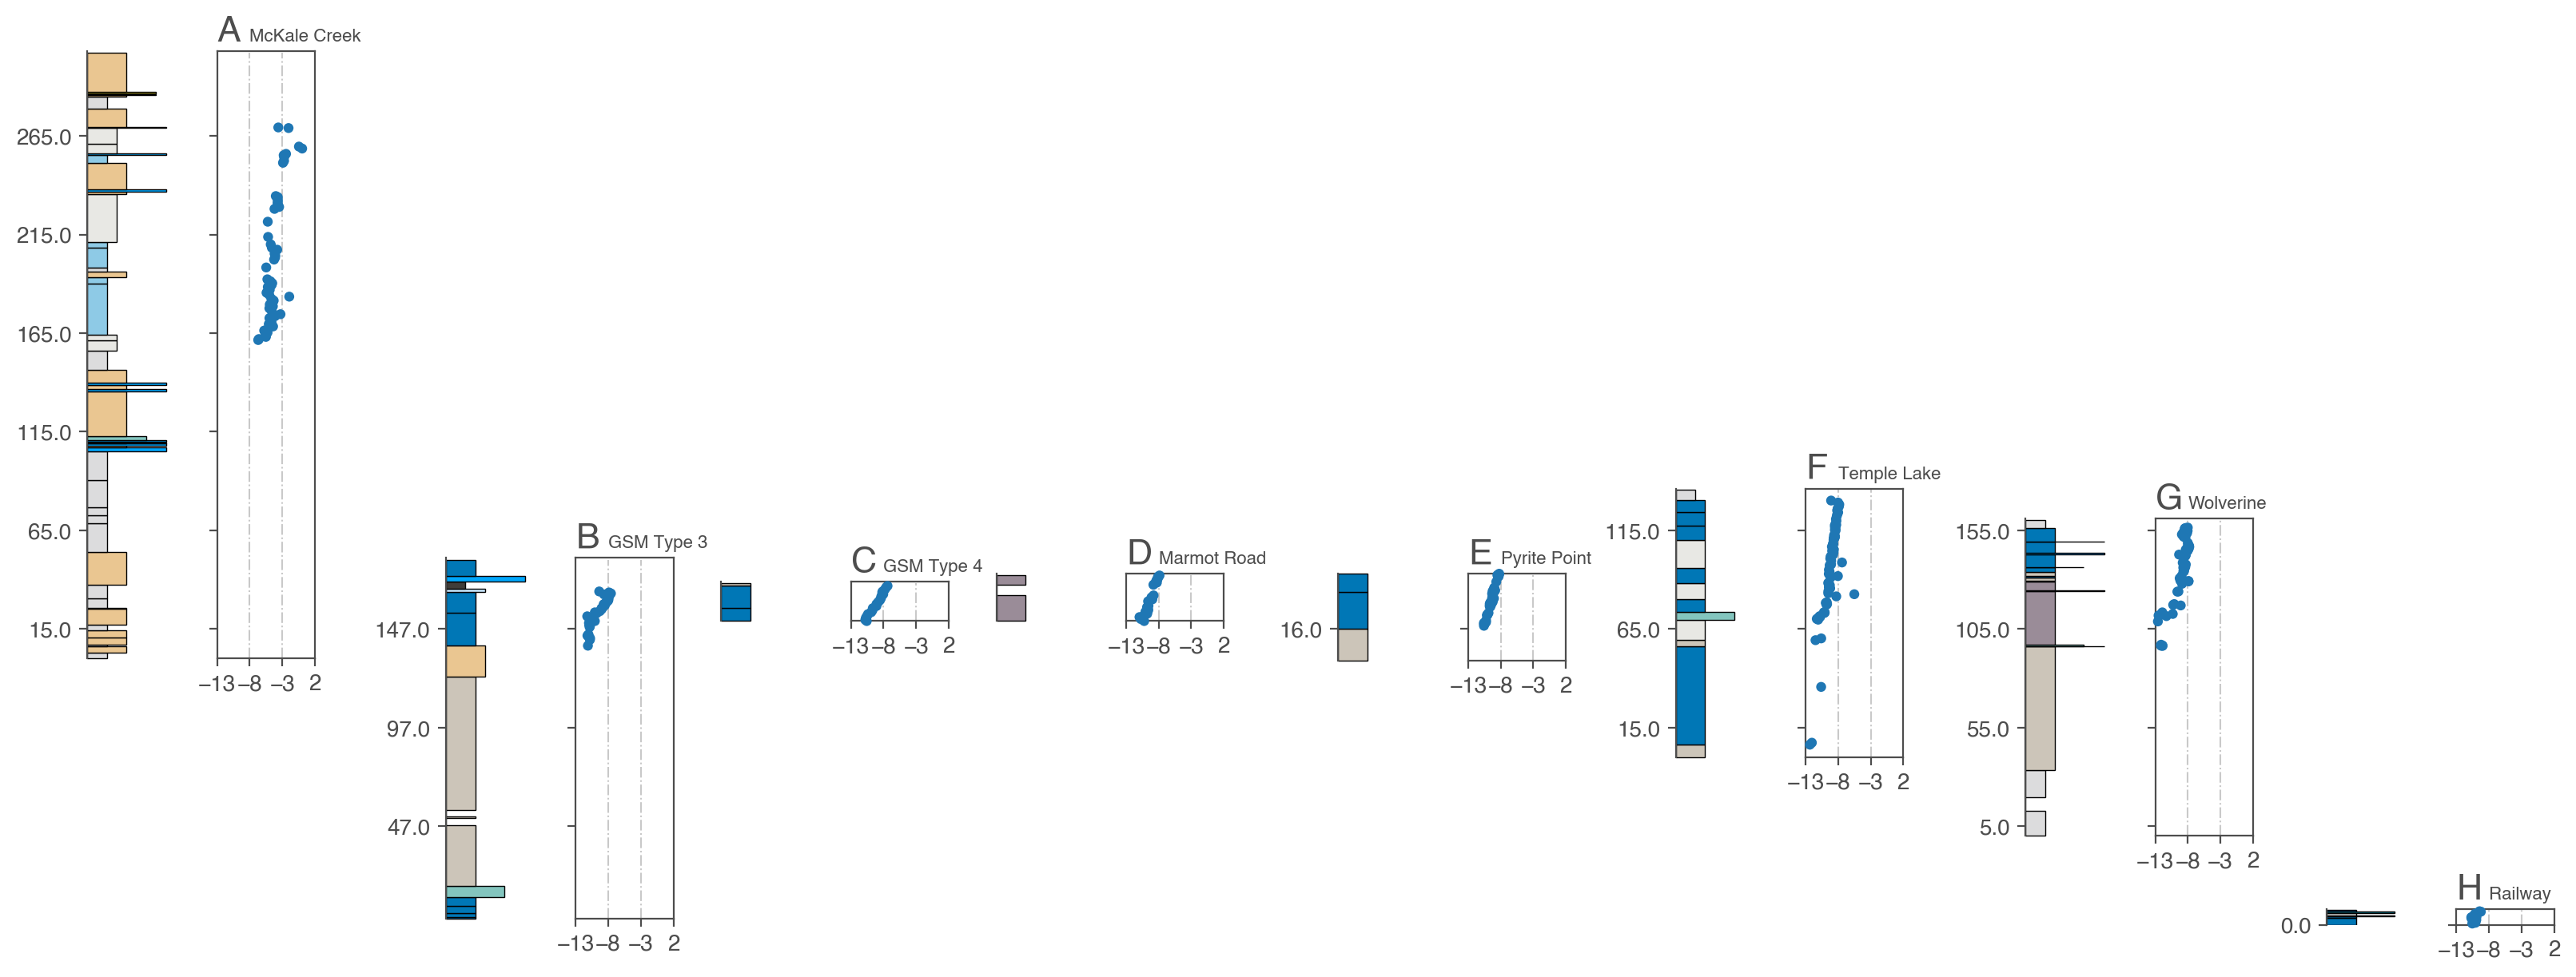

In [14]:
## organizing north to south
# sections to include in composite, re-order as needed -> vanstrat:(geochem,section base)

low= 100
data = {mckale:(C16_sec,low+135),
        gsm:(C1_sec_below_unf1,low+3),
        thrust:(C2_sec,low+154), # 149
        marm:(C3_sec,low+154), # 140
        pyr:(C5_sec,low+134),
        temple:(C8_sec,low+85),
        wolv:(C13_sec,low+45),# 115
        train:(C9_sec,low+0)}

labels = [i.data['index'].iloc[0] for i in data.keys()]

t_col = np.arange(2*len(data))

# height limits
maxh = np.ceil(max([float(key.total_thickness)+val[1] for key,val in data.items()]))
minh = low

# isotope limits
minc = np.floor(min([min(val[0]['d13c_carb']) for idx,val in data.items()]))
maxc = np.ceil(max([max(val[0]['d13c_carb']) for idx,val in data.items()]))

fig,ax = plt.subplots(1,len(t_col),figsize=(16,6),sharey=False,sharex=False,width_ratios=len(t_col)*[1],layout='constrained')

# strat columns
for idx,(key,val),l in zip(t_col[::2],data.items(),labels):
    section = val[0]
    sec_base = val[1]
    minht = np.floor(min(section['sample_height']))+sec_base
    key.strat_col(ax=ax[idx],linewidth=0.5,base=sec_base)
    ax[idx].set_ylim(minh,maxh)
    tot_h = np.ceil(key.total_thickness+sec_base)
    #ax[idx].set_yticks([int(i) for i in np.linspace(0+sec_base,np.ceil(tot_h),4)])
    ax[idx].set_yticks([i for i in list(ax[idx].get_yticks()) if i>=sec_base and i<=sec_base+key.total_thickness])
    labs = [item.get_text() for item in ax[idx].get_yticklabels()]
    for i,j in enumerate(labs):
        new  = np.rint(float(j)-sec_base) if sec_base>0 else np.rint(float(j)+sec_base)
        labs[i] = f'{new}'
    ax[idx].set_yticklabels(labs)
    ax[idx].spines[['left','right']].set_bounds(sec_base,tot_h)
    ax[idx].spines['bottom'].set_position(('data',sec_base))

al = ['A','B','C','D','E','F','G','H']
excs = [0,70,110,152,0,0,15,0]
# geochemistry
for prev,idx,(key,val),l,a,e in zip(t_col[::2],t_col[1::2],data.items(),labels,al,excs):
    ax[idx].sharey(ax[prev])
    section = val[0]
    sec_base = val[1]
    min_samp = np.floor(min(val[0]['sample_height']))+sec_base
    [label.set_visible(False) for label in ax[idx].get_yticklabels()]
    tot_h = key.total_thickness+sec_base
    sns.scatterplot(x=section['d13c_carb'],y=section['sample_height']+sec_base,ax=ax[idx],facecolor='C0',marker='o',edgecolor='none',clip_on=False,zorder=10,s=20)
    ax[idx].set_ylim(minh,maxh)
    ax[idx].set_xlim(minc,maxc)
    xt =[-13,-8,-3,2]
    ax[idx].set_xticks(xt)
    for i in xt[1:-1]:
        ax[idx].vlines(i,ymin=sec_base,ymax=tot_h,linestyle='-.', color='.3',alpha=0.3,zorder=0,lw=0.75) 
    ax[idx].set_ylabel(None)
    samp_t = np.ceil(max(section['sample_height']+sec_base))
    samp_b = np.floor(min(section['sample_height']+sec_base))
    tot_h = np.ceil(key.total_thickness+sec_base)
    ax[idx].spines[['left','right']].set_bounds(sec_base,tot_h)
    ax[idx].spines['bottom'].set_position(('data',sec_base))
    ax[idx].spines['top'].set_position(('data', tot_h))
    ax[idx].set_xlabel(None)
    ax[idx].text(xt[0],tot_h+5,a,transform=ax[idx].transData,fontsize=16)
    #ax[idx].set_yticks([int(i) for i in np.linspace(0+sec_base,np.ceil(tot_h),4)])
    # alignment line for excursion hinge
    # ax[idx].axhline(e+sec_base,ls='--',color='k')
    # ax[prev].axhline(e+sec_base,ls='--',color='k')
    ax[idx].text(xt[0]+5,tot_h+5,l,fontsize=8)


el = [Patch(facecolor='lightblue', edgecolor='.3',label='Whitehorn Mountain Mbr.'),
      Patch(facecolor='lightgrey', edgecolor='.3',label='Geikie Siding Mbr.'),
      Patch(facecolor='plum', edgecolor='.3',label='Temple Lake Mbr.'),
      Patch(facecolor='navajowhite', edgecolor='.3',label='Corral Creek Fm.')]
#ax[0].legend(handles=el,loc=3,bbox_to_anchor=(-1,0.1),frameon=False,fontsize=10,handletextpad=0.4,markerfirst=True,handlelength=0.75)

# hspans
tlm_col = 'plum'
wmm_col = 'lightblue'
gsm_col = 'grey'
cck_col = 'navajowhite'
# ax[1].axhspan(235,610,alpha=0.3,zorder=0,lw=0,color=wmm_col)
# ax[3].axhspan(150,280,alpha=0.3,zorder=0,lw=0,color=tlm_col)
# ax[3].axhspan(280,287,alpha=0.3,zorder=0,lw=0,color=gsm_col)
# ax[5].axhspan(105,261,alpha=0.3,zorder=0,lw=0,color=tlm_col)
# ax[5].axhspan(261,265,alpha=0.3,zorder=0,lw=0,color=gsm_col)
# ax[7].axhspan(267,272,alpha=0.3,zorder=0,lw=0,color=gsm_col)
# ax[7].axhspan(272,283,alpha=0.3,zorder=0,lw=0,color=wmm_col)
# ax[7].axhspan(100,267,alpha=0.3,zorder=0,lw=0,color=tlm_col)
# ax[9].axhspan(250,269,alpha=0.3,zorder=0,lw=0,color=tlm_col)
# ax[11].axhspan(250,274,alpha=0.3,zorder=0,lw=0,color=tlm_col)
# ax[13].axhspan(234,278,alpha=0.3,zorder=0,lw=0,color=tlm_col)
# ax[15].axhspan(100,109,alpha=0.3,zorder=0,lw=0,color=cck_col)



#fig.savefig(fig_dir+'test_strat.svg',format='svg',bbox_inches='tight',transparent=True)

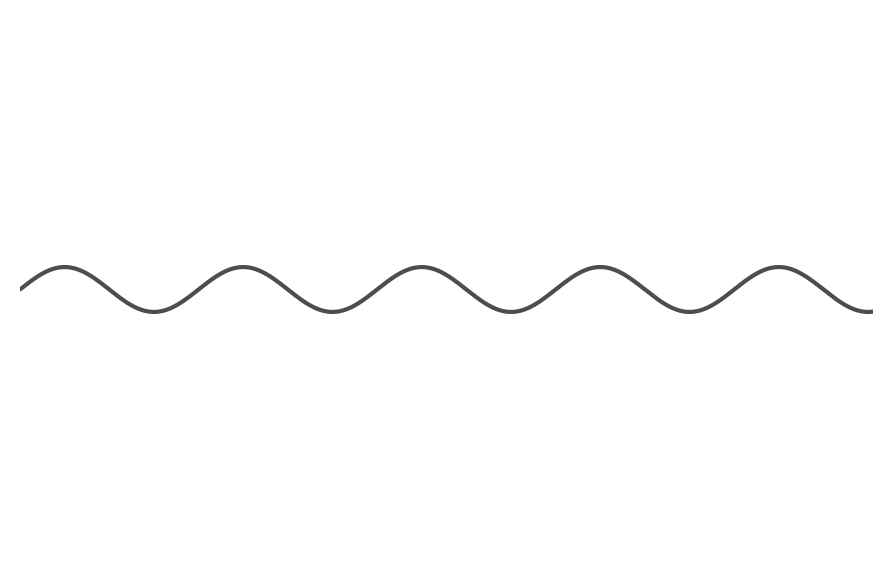

In [15]:
fig,ax = plt.subplots()

x = np.linspace(0,2*np.pi,1000)
y = np.sin(10*x)
ax.plot(x,y,color='.3')
ax.set_ylim(-12,12)
ax.set_xlim(0,3)
ax.axis('off')
fig.savefig(fig_dir+'sin.pdf',format='pdf',bbox_inches='tight',transparent=True)